In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import Video
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import importlib
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from src import Frame, Rectangle, VideoReader, VideoWriter

# 3415, 3457, 5029-5047, 5062-

# vid = VideoReader('tests/videos/wr.mp4')
# frame = vid[9555]
# vid.release()
# frame = Frame.from_file('tests/images/chest.2.png')
# frame

# wr_missed = [4034,4035,4363,*range(8085,8104),*range(8262,8266),*range(8862,8885),
#  *range(9507,9512),*range(9527,9576),*range(9629,9655),*range(9869,9875),
#  *range(9882,9886),*range(9971,9999),*range(10041,10069),*range(10175,10188),*range(10251,10324)]

def largest_rectangle(rectangles):
    sizes = [rect.area for rect in rectangles]
    return rectangles[sizes.index(max(sizes))]

def absorb_intersecting(target, rectangles):
    target = target.copy()
    intersecting_found = True
    while intersecting_found:
        intersecting_found = False
        not_used = []
        for other in rectangles:
            if target.intersects(other):
                intersecting_found = True
                target += other
            else:
                not_used.append(other)
        rectangles = not_used
    return target

def draw_module_detection(frame):
    img = (frame*0)
#     img = frame.copy()
    blurred = frame.median_blur(19)
    selected_colors = blurred.hsv_range((0,0,190),(255,5,210)) | blurred.hsv_range((0,0,125),(255,10,145))
    stretched = selected_colors.dilate(10)
    contours = stretched.find_contours(mode='external')
    rectangles = [Rectangle.from_contour(contour, mode='bound') for contour in contours]
    if len(contours):
        rect = largest_rectangle(rectangles)
        rect = absorb_intersecting(rect, rectangles)
        dist = abs(rect.cx-frame.width/2) + abs(rect.cy-frame.height/2)
        dist /= frame.width+frame.height
        size = (rect.width+rect.height) / (frame.width+frame.height)
        img.draw_text('{:.2%}'.format(dist), (200, frame.height-3), replace=True)
        if 0.2 < size < 0.5 and dist < 0.01:
            img.draw_contours(contours, replace=True, color=(150,150,150))
            img.draw_rectangles(rectangles, replace=True, color=(255,255,255))
            img.draw_rectangle(rect, color=(0,255,0), thickness=3, replace=True)
            return img

In [2]:
vid = VideoReader('tests/videos/couriway.mp4')
with VideoWriter('not_matching.mp4', fourcc='H264', fps=30, size=vid.size) as not_matching:
    with VideoWriter('matching.mp4', fourcc='H264', fps=30, size=vid.size) as matching:
        for frame in vid:
            img = draw_module_detection(frame)
            frame.draw_text(str(vid.pos), (frame.width//2,30), replace=True)
            if img is not None:
                img.draw_text(str(vid.pos), (frame.width//2, 30), replace=True)
                matching.write(frame)
            else:
                not_matching.write(frame)
vid.release()

KeyboardInterrupt: 

<Frame (1080, 1920, 3)>

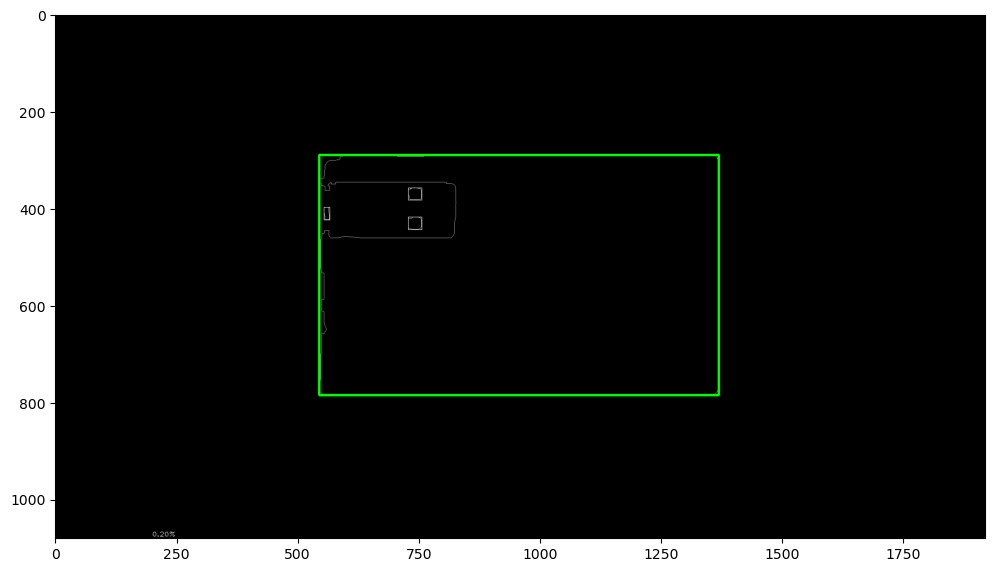

In [11]:
vid = VideoReader('tests/videos/couriway.mp4')
frame = vid[9510]
vid.release()
draw_module_detection(frame)

0.44 0.002


<Frame (1080, 1920, 3)>

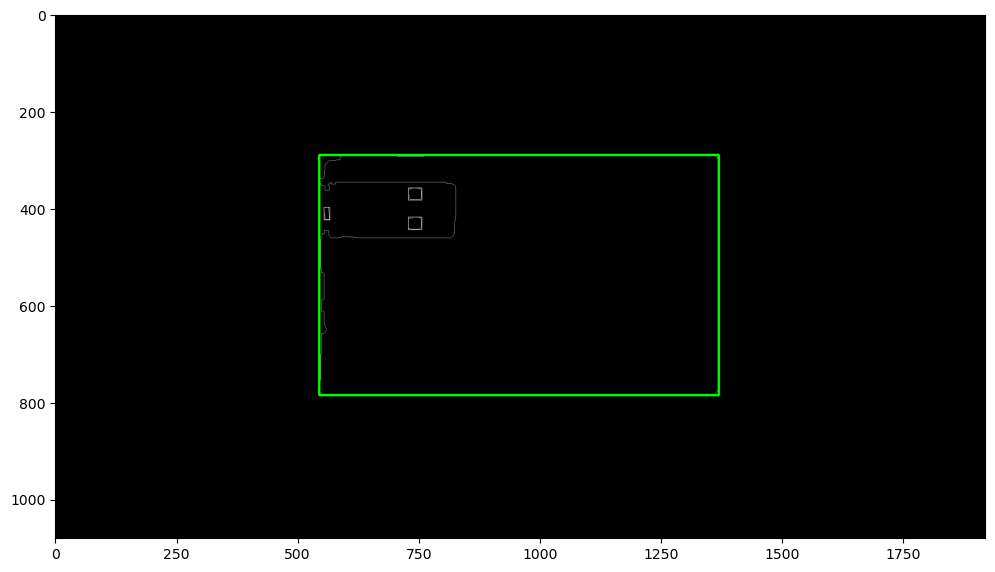

In [9]:
img = (frame*0)
blurred = frame.median_blur(19)
selected_colors = (blurred.hsv_range((0,0,190),(255,5,210)) | blurred.hsv_range((0,0,125),(255,10,145)))
stretched = selected_colors.dilate(10)
contours = stretched.find_contours(mode='external')
rectangles = [Rectangle.from_contour(contour, mode='bound') for contour in contours]
rect = largest_rectangle(rectangles)
rect = absorb_intersecting(rect, rectangles)
dist = abs(rect.cx-frame.width/2) + abs(rect.cy-frame.height/2)
dist /= frame.width+frame.height
size = (rect.width+rect.height) / (frame.width+frame.height)
print(size, dist)
img.draw_contours(contours, replace=True, color=(150,150,150))
img.draw_rectangles(rectangles, replace=True, color=(255,255,255))
img.draw_rectangle(rect, color=(0,255,0), thickness=3, replace=True)
img

<Frame (1080, 1920, 3)>

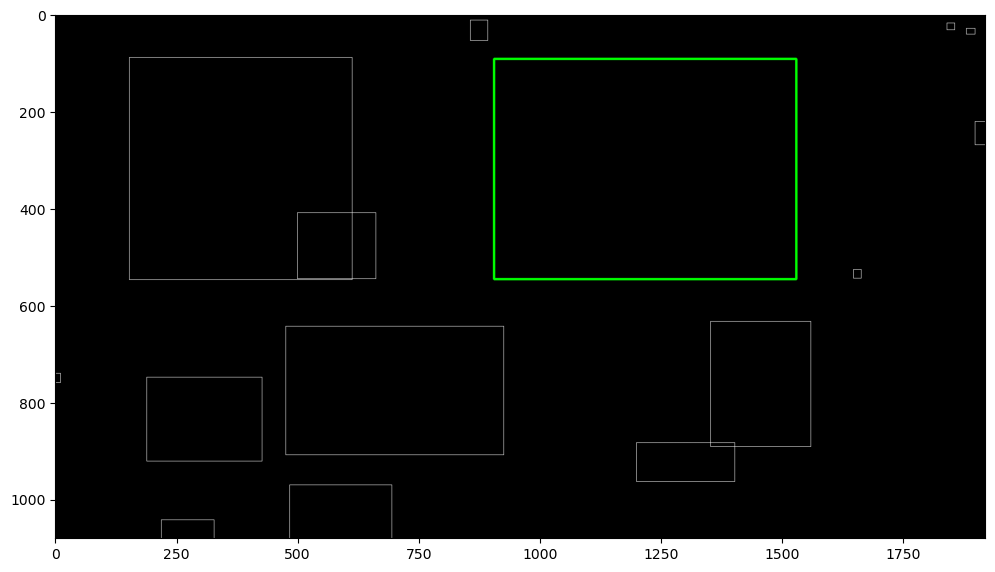

In [5]:
    contours = frame.median_blur(19).hsv_range((0,0,195),(255,1,215)).erode(5).dilate(5).find_contours(mode='external')
    rectangles = [Rectangle().from_contour(contour, mode='bound') for contour in contours]

In [6]:
rectangles[0].x1 < frame.width/2 and rectangles[0].x2 > frame.width/2

True

In [7]:
frame.width/2

960.0

<Frame (1080, 1920, 3)>

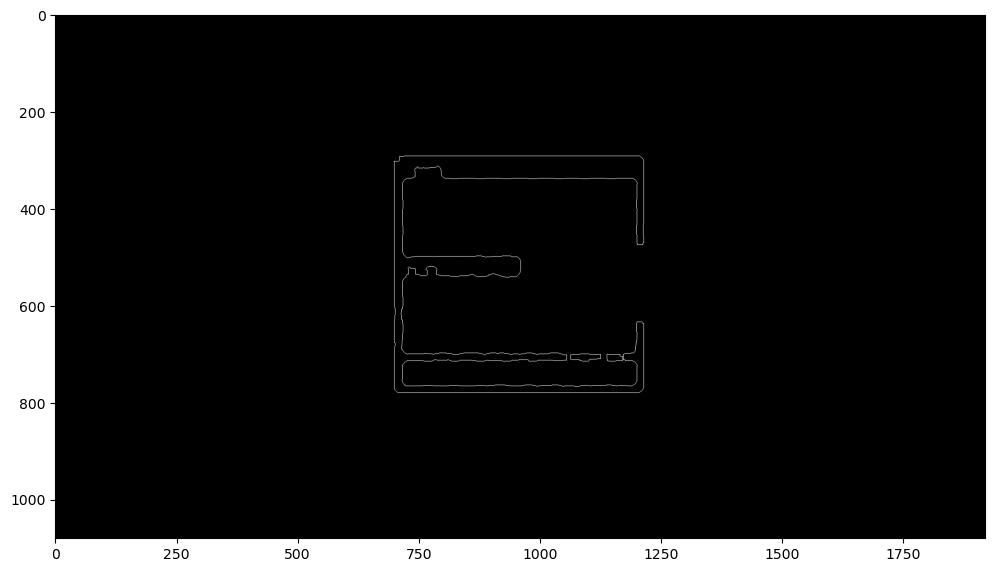

In [88]:
(frame*0).draw_contours(contours, color=(255,255,255), replace=True)

In [ ]:
filtered = frame.median_blur(3)
highlights = filtered.hsv_range((0,0,225),(255,255,255))
shadows = filtered.hsv_range((0,0,40),(255,255,100))

In [36]:
'FONT_ITAL' in dir(cv)

False